CSC 6621 Mini Lab 1
March 1, 2024
By Arsalon Amini

In [88]:
# setup tooling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

In [89]:
# load the data
iris = load_iris()

In [90]:
# observe the data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.head())

print(iris_df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [91]:
# Build an SVM classifier using petal length and widths as features (without scaling)

# Extract petal length and width features
X = iris.data[:, 2:4]  # petal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [105]:
# Build an SVM classifier using petal length and widths as features (with scaling)

# Extract petal length and width features
X = iris.data[:, 2:4]  # petal length and width
y = iris.target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply standard scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predications
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Swap positive and negative classes
y_test_swapped = 1 - y_test
y_pred_swapped = 1 - y_pred

# Calculate performance metrics with swapped classes
accuracy_swapped = accuracy_score(y_test_swapped, y_pred_swapped)
precision_swapped = precision_score(y_test_swapped, y_pred_swapped, average='weighted')
recall_swapped = recall_score(y_test_swapped, y_pred_swapped, average='weighted')
f1_swapped = f1_score(y_test_swapped, y_pred_swapped, average='weighted')

print("\nMetrics with Swapped Classes:")
print("Accuracy (Swapped):", accuracy_swapped)
print("Precision (Swapped):", precision_swapped)
print("Recall (Swapped):", recall_swapped)
print("F1-score (Swapped):", f1_swapped)

Accuracy: 0.9555555555555556
Precision: 0.9614814814814815
Recall: 0.9555555555555556
F1-score: 0.9552910052910052

Metrics with Swapped Classes:
Accuracy (Swapped): 0.9555555555555556
Precision (Swapped): 0.9614814814814815
Recall (Swapped): 0.9555555555555556
F1-score (Swapped): 0.9552910052910053


In [96]:
# Hyperparameter experimentation - Petal length vs width (scaled)

X = iris.data[:, 2:4]  # Petal length and width
y = iris.target

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create an SVM classifier
svm_model = SVC(random_state=42)

# Create a GridSearchCV object w/ 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the scaled training data
grid_search.fit(X_scaled, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best SVM model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predictions
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


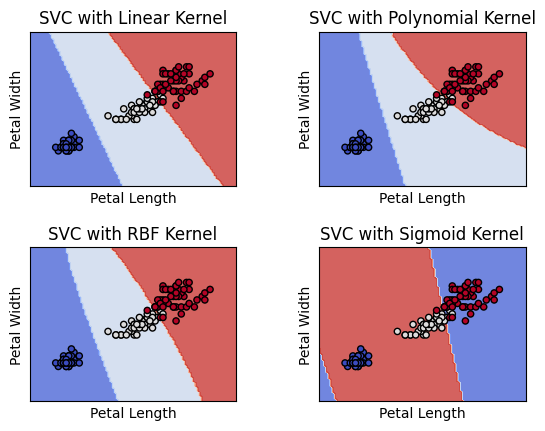

In [97]:
#Visualize Decision boundaries - Petal length vs width (unscaled)

# Extract petal length and width features
X = iris.data[:, 2:4]  # petal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM models with different kernels
models = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='sigmoid', random_state=42)
]

# Title for the plots
titles = (
    "SVC with Linear Kernel",
    "SVC with Polynomial Kernel",
    "SVC with RBF Kernel",
    "SVC with Sigmoid Kernel"
)

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterate over models and plot decision boundaries
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Plot decision boundaries
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax
    )
    
    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    # Set labels and title
    ax.set_xlabel("Petal Length")
    ax.set_ylabel("Petal Width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [98]:
#  Build an SVM classifier using sepal length and widths as features (without scaling)

# Extract Sepal length and width features
X = iris.data[:, :2]  # Sepal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9
Precision: 0.9013888888888889
Recall: 0.9
F1-score: 0.8992327365728899


In [99]:
#  Build an SVM classifier using sepal length and widths as features (with scaling)

# Extract Sepal length and width features
X = iris.data[:, :2]  # Sepal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predications
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8
Precision: 0.8094276094276095
Recall: 0.8
F1-score: 0.8


In [100]:
# Hyperparameter experimentation - Sepal length vs width (scaled)

X = iris.data[:, :2]  # Sepal length and width
y = iris.target

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create an SVM classifier
svm_model = SVC(random_state=42)

# Create a GridSearchCV object w/ 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the scaled training data
grid_search.fit(X_scaled, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best SVM model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predictions
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.8333333333333334
Precision: 0.8366666666666667
Recall: 0.8333333333333334
F1-score: 0.83375104427736


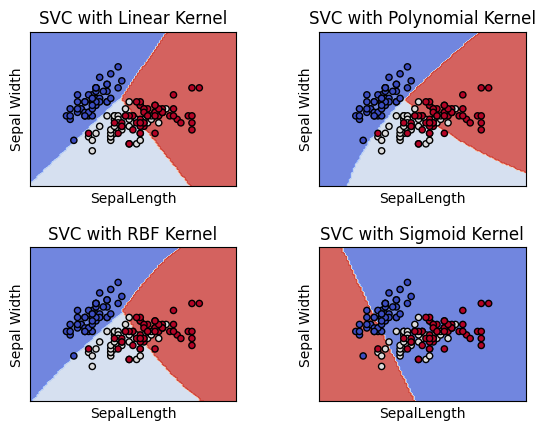

In [104]:
#Visualize Decision boundaries - Sepal length vs width (unscaled)

# Extract sepal length and width features
X = iris.data[:, :2]  # Sepal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM models with different kernels
models = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='sigmoid', random_state=42)
]

# Title for the plots
titles = (
    "SVC with Linear Kernel",
    "SVC with Polynomial Kernel",
    "SVC with RBF Kernel",
    "SVC with Sigmoid Kernel"
)

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterate over models and plot decision boundaries
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Plot decision boundaries
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax
    )
    
    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    # Set labels and title
    ax.set_xlabel("SepalLength")
    ax.set_ylabel("Sepal Width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [68]:
# Using K-nearest neighbors to perform classification on the data (Scaled)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [85]:
# Using K-nearest neighbors to perform classification on the data (Scaled)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [86]:
# KNN for Sepal width vs. sepal length
# Using K-nearest neighbors to perform classification on the data (un Scaled)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [103]:
# Hyperparameter tuning for KNN

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset to setup the experiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search using the param grid outlined above
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid_search object
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# using test set to make predictions
y_pred = best_knn.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics with Best Hyperparameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

Evaluation Metrics with Best Hyperparameters:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


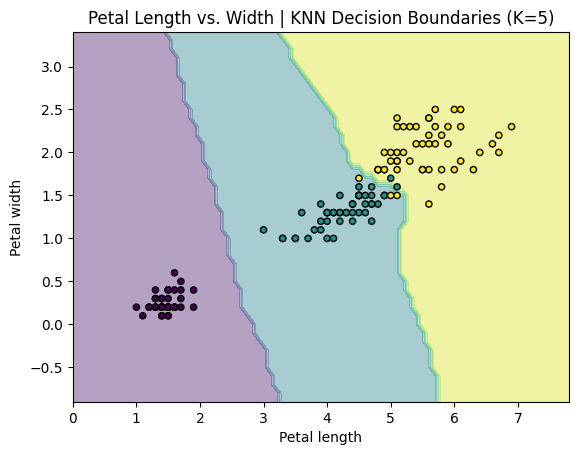

In [83]:
# Visualize the decision boundary for KNN

# Load Iris dataset
iris = load_iris()
X, y = iris.data[:, 2:4], iris.target  # Using only petal length vs. width (to visualize)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Generate grid points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Length vs. Width | KNN Decision Boundaries (K=5)')
plt.show()

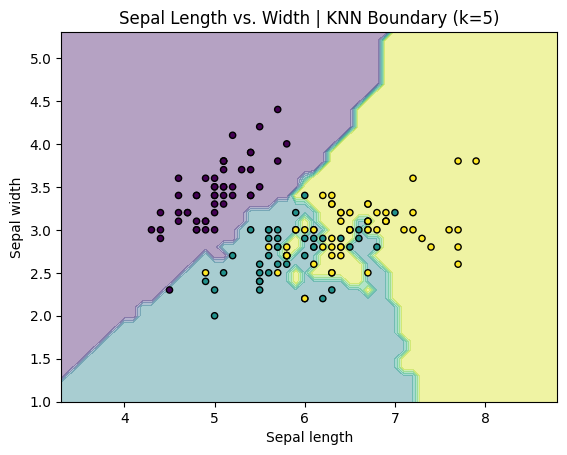

In [84]:
# Visualize the decision boundary for KNN - Sepal length vs. width

# Load Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using only sepal length vs. width (to visualize)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Generate grid points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Length vs. Width | KNN Boundary (k=5)')
plt.show()